In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Ads_CTR_Optimisation.csv")

In [18]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [19]:
df.shape

(10000, 10)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [21]:
import math

In [31]:
N = 10000
d =10
ads_selected = []
numbers_of_selection = [0] * d
sum_of_rewards = [0] * d
total_rewards = 0
for n in range (0, N):
    ad = 0
    max_upper_bound = 0
    for i in range (0, d):
        if (numbers_of_selection[i]>0):
            average_reward = sum_of_rewards[i]/ numbers_of_selection[i]
            delta_i = math.sqrt(3/2* math.log(n+1)/ numbers_of_selection[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if (upper_bound>max_upper_bound):
                max_upper_bound = upper_bound
                ad = i
        ads_selected.append(ad)
        numbers_of_selection [ad] = numbers_of_selection[ad] + 1
        reward = df.values [n, ad]
        sum_of_rewards[ad] = sum_of_rewards[ad] + reward
        total_rewards = total_rewards + reward

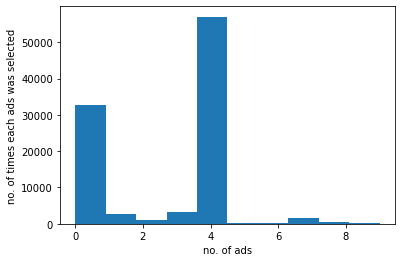

In [35]:
plt.hist(ads_selected)
plt.xlabel('no. of ads')
plt.ylabel('no. of times each ads was selected')
plt.show()